In [86]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from sklearn.decomposition import PCA
from ast import literal_eval
from collections import Counter

In [87]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile.csv")

/home/chiran/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (3,5,6,8,9,11,12,14,15,17,18,19,21,23,24,25,27,29,33,34,35,36,74,75) have mixed types.Specify dtype option on import or set low_memory=False.



### Selecting only usage information available sub set

In [88]:
user_profile = user_profile[(user_profile["ONNET_OUTGOING_Scaled"].notnull())]

## Scaling Categorical Features

In [89]:
data = user_profile.iloc[:,[4,7,10,13,16,20,26,28,62,18,23,24,29,30,32,38,41,45,49,64,66,68,70,72,74,75]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 88 to 20103
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ONNET_OUTGOING_Scaled         3078 non-null   float64
 1   ONNET_INCOMING_Scaled         2965 non-null   float64
 2   OFFNET_OUTGOING_Scaled        2962 non-null   float64
 3   OFFNET_INCOMING_Scaled        3019 non-null   float64
 4   IDD_INCOMING_Scaled           1530 non-null   float64
 5   IDD_OUTGOING_Scaled           497 non-null    float64
 6   PEO_TV_Scaled                 1190 non-null   float64
 7   BB_Scaled                     1175 non-null   float64
 8   BB_Extra_GB_Purchased_Scaled  31 non-null     float64
 9   IDD_incoming_country          1530 non-null   object 
 10  IDD_outgoing_country          497 non-null    object 
 11  Peo_TV_Package                1190 non-null   object 
 12  Location_Identifier           3078 non-null   object 
 13  G

In [90]:
data["Location_Identifier"] = data["Location_Identifier"].astype("category") # -1 recorrection
data["Location_Identifier_Scaled"] = data["Location_Identifier"].cat.codes

<ipython-input-90-cb17529bf8da>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-cb17529bf8da>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
data["Location_Identifier_Scaled"] = data["Location_Identifier_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["Location_Identifier_Scaled"].unique()

<ipython-input-91-7e72dc772518>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([33, 12, 24, 16, 11,  2, 41, 27, 42, 29,  3, 22, 14, 20, 17, 28, 18,
       32, 31,  8, 34, 44, 23, 10, 26, 38, 39, 46, 15, 40, 19, 37, 30, 36,
        1,  4,  6,  0,  9, 35,  5,  7, 21, 25, 47, 13, 45, 43])

In [92]:
data["Sub_Type"] = data["Sub_Type"].astype("category")
data["Sub_Type_Scaled"] = data["Sub_Type"].cat.codes
data["Sub_Type_Scaled"].unique()

<ipython-input-92-e13cfdf50d96>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-92-e13cfdf50d96>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([4, 1, 3, 2, 0], dtype=int8)

In [93]:
data["IDD_incoming_country"] = data["IDD_incoming_country"].astype("category")
data["IDD_incoming_country_Scaled"] = data["IDD_incoming_country"].cat.codes

<ipython-input-93-fd72d2ad8ca9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-fd72d2ad8ca9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
data["IDD_incoming_country_Scaled"] = data["IDD_incoming_country_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["IDD_incoming_country_Scaled"].unique()

<ipython-input-94-5101508b466e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([  0, 641, 842, 286, 142,   5, 358, 262, 462, 632, 111, 509, 266,
        53, 488, 294, 339, 430, 117, 122,  62,  18, 201, 133, 635, 832,
       574, 663, 569, 856, 785, 120, 717, 232, 581, 788,  43, 839, 769,
       636, 621, 664, 225, 850, 531, 437, 671, 837, 838, 441, 770, 634,
       212, 594, 112, 227, 222, 134, 639, 228,  46, 350, 478, 522,  51,
       766, 203, 104, 452, 858, 772, 263, 192, 755, 756, 402, 695,  91,
        24, 566, 763, 727, 568, 662, 669, 578, 102, 775, 776, 169, 386,
       760, 782, 540, 794, 185, 308, 492, 572, 587, 563,  92, 200, 107,
       129, 612, 826, 390, 283, 627, 321, 660, 241, 577, 330, 221, 537,
       295, 648, 606,   9, 127, 726, 483, 656, 691, 630, 450,  60,  93,
       459, 126, 724, 110, 226, 753, 735, 655, 601, 784, 573, 440,  68,
       485, 789, 417, 668, 743, 513, 723, 553, 243, 184, 310, 852, 712,
       736, 824, 504, 801, 825, 600, 220, 557, 401, 631,  10, 555, 175,
       204, 767,  52, 141, 525, 333, 317, 670, 157, 206, 208, 62

In [95]:
data["IDD_outgoing_country"] = data["IDD_outgoing_country"].astype("category")
data["IDD_outgoing_country_Scaled"] = data["IDD_outgoing_country"].cat.codes

<ipython-input-95-b5f4ec959986>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-b5f4ec959986>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
data["IDD_outgoing_country_Scaled"] = data["IDD_outgoing_country_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["IDD_outgoing_country_Scaled"].unique()

<ipython-input-96-f1a47fc6ce37>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([168,   0, 135, 177,  69, 164, 127, 131, 124,  33, 163, 137, 161,
       116, 146,  93,  20, 103,  81,  54, 132, 104, 162,  76,  14, 156,
       105, 149, 117,   9, 150,  46,  23, 120,  83, 166,  31,   7,   3,
        64,  78,  98,  30, 171,  77,  82,  52,  39,   5,   4, 114,   6,
        27, 110, 151,  38,  13, 101,  86,  32,  11, 115,  55, 136, 118,
       170,  22,  15,  21, 138,  43,  71, 172,  41,  60,  17, 130, 143,
        12, 152,  90,  96,  29, 173,  35,  24,  87, 144, 133,  42, 158,
        36, 140,  34,  28,  95,   8, 139, 123, 145,  51, 142, 106,  70,
        25,  47,  62,  84,  45, 157, 154,  88,  16, 125,  18,  68,  37,
       147, 102, 167,  19,  26, 107, 128,  74,  72,  63,  48, 134,  40,
        50,  94,  57, 155, 165,  65, 100,  10,  53,  49, 119, 129,  91,
       176,  61, 174,  56,   1, 153, 126,  99,  67,  79, 108,  85,  58,
        59, 112,  92, 148,  97,  80,  73, 175, 121,   2, 113, 122, 169,
       159,  75,  89, 160, 109, 141, 111,  66,  44])

In [97]:
data["Having_Insurance"] = data["Having_Insurance"].astype("category") # 0 YES -1 NO
data["Having_Insurance_Scaled"] = data["Having_Insurance"].cat.codes

<ipython-input-97-564ce4298cf2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-97-564ce4298cf2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
data["Having_Insurance_Scaled"] = data["Having_Insurance_Scaled"].apply(lambda x: 1 if x==0 else 0)
data["Having_Insurance_Scaled"].unique()

<ipython-input-98-e6c5dc8e9a55>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 1])

In [99]:
data["Peo_TV_Package"] = data["Peo_TV_Package"].astype("category")
data["Peo_TV_Package_Scaled"] = data["Peo_TV_Package"].cat.codes

<ipython-input-99-eaeabfd94338>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-eaeabfd94338>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
data["Peo_TV_Package_Scaled"] = data["Peo_TV_Package_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["Peo_TV_Package_Scaled"].unique()

<ipython-input-100-0b987941e0d5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([11,  0, 13, 10, 16, 14,  4, 15, 17,  3,  6, 18,  9,  1,  5,  7,  8,
       12,  2, 19, 20])

In [101]:
data["GENDER"] = data["GENDER"].astype("category")
data["GENDER_Scaled"] = data["GENDER"].cat.codes

<ipython-input-101-d4b018b7df53>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-d4b018b7df53>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
def gender_scale(gender):
    if gender ==0:
        return 0.1
    elif gender ==1:
        return 0.2
    elif gender == -1:
        return 0

In [103]:
data["GENDER_Scaled"] = data["GENDER_Scaled"].apply(lambda x: gender_scale(x))
data["GENDER_Scaled"].unique()

<ipython-input-103-45d8e27b5444>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0.1, 0.2, 0. ])

In [104]:
data["AGE"] = data["AGE"].astype("category")
data["AGE_Scaled"] = data["AGE"].cat.codes

<ipython-input-104-64332327db06>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-104-64332327db06>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
data["AGE_Scaled"] = data["AGE_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["AGE_Scaled"].unique()

<ipython-input-105-96a0dac1ba5c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([28, 54, 29, 27, 24,  0, 12, 25, 39, 15, 14, 17, 46, 35, 34, 44, 40,
       20,  6, 38, 23, 30, 21, 63, 22, 53, 33, 13,  8,  5, 36, 48, 31, 61,
       42, 52, 37, 58, 41, 56, 57, 47, 49, 16, 55, 45, 60, 50, 18, 19, 32,
       62, 59, 66, 67, 11, 43, 69, 51, 26, 75, 70, 71, 74, 72, 64, 77, 65,
       73, 81, 68, 79,  9,  3,  4,  7, 10,  2, 76, 82, 78, 80,  1])

In [106]:
data["Voice_VAS_Package"] = data["Voice_VAS_Package"].astype("category")
data["Voice_VAS_Package_Scaled"] = data["Voice_VAS_Package"].cat.codes

<ipython-input-106-eff6e1b32011>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-106-eff6e1b32011>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
data["Voice_VAS_Package_Scaled"] = data["Voice_VAS_Package_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["Voice_VAS_Package_Scaled"].unique()

<ipython-input-107-c14e3b212b95>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([  0, 241,  87,  35,   1, 172,  82,  24, 226, 153, 195,  15,  83,
       167,  45,  67,  80, 244,  75, 238, 252, 254, 166, 102, 144, 222,
        27, 267,  72,  12,  40, 146, 142, 173,  13, 141,  30, 192, 138,
       136,  79,  81, 196,  26, 205, 154, 228, 135,  99,  46, 199, 206,
        60, 178, 133, 162, 104,  33, 261,  97, 202,  31, 124, 149, 242,
       177, 110, 139, 123, 249, 129,  65, 210, 140, 234, 105, 211, 122,
        77,  90, 213, 101,  41,  73,  32, 218, 171, 256, 185, 132, 134,
       161, 212, 204,  86,  37,  22,  56, 236,  43, 237, 259, 248, 247,
       209, 170,  69, 246, 113, 152, 118, 156, 217,  39,  14, 260, 262,
         9,  28,  66, 168, 100,  58, 157, 263,  44, 198,  61,  95, 186,
       197,  29, 155, 215, 169,  51,  25, 200, 103, 194, 239, 130,  38,
         6,  94,  84, 145, 220,  92,  34, 191, 203, 125,  93,   3, 120,
       224,  98,  96, 151, 116,  55,   5, 131, 174, 229,  76, 184,  21,
        36,  74,   8, 127, 231, 265,  49,  50,  57, 264,  18, 18

In [108]:
data["BB_VAS_Package"] = data["BB_VAS_Package"].astype("category")
data["BB_VAS_Package_Scaled"] = data["BB_VAS_Package"].cat.codes

<ipython-input-108-9ab3b15faa11>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-9ab3b15faa11>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
data["BB_VAS_Package_Scaled"] = data["BB_VAS_Package_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["BB_VAS_Package_Scaled"].unique()

<ipython-input-109-10f7015ccb6f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 7, 4, 2, 1, 5, 6, 3])

In [110]:
data["Peo_VAS_Package"] = data["Peo_VAS_Package"].astype("category")
data["Peo_VAS_Package_Scaled"] = data["Peo_VAS_Package"].cat.codes

<ipython-input-110-8c60f5a84233>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-8c60f5a84233>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
data["Peo_VAS_Package_Scaled"] = data["Peo_VAS_Package_Scaled"].apply(lambda x: 0 if x==-1 else x)
data["Peo_VAS_Package_Scaled"].unique()

<ipython-input-111-3aae39091396>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([ 0,  5, 10, 14,  7,  1,  8, 16,  4,  6,  3, 13, 12, 11,  2,  9, 15])

In [112]:
data["Having_Senior_Citizen"] = data["Having_Senior_Citizen"].astype("category")
data["Having_Senior_Citizen_Scaled"] = data["Having_Senior_Citizen"].cat.codes

<ipython-input-112-53e6c6142d31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-53e6c6142d31>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
data["Having_Senior_Citizen_Scaled"] = data["Having_Senior_Citizen_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Senior_Citizen_Scaled"].unique()

<ipython-input-113-b4eadc4b20a6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [114]:
data["Having_Kids_at_Home"] = data["Having_Kids_at_Home"].astype("category")
data["Having_Kids_at_Home_Scaled"] = data["Having_Kids_at_Home"].cat.codes

<ipython-input-114-7a72478ed01e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-7a72478ed01e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
data["Having_Kids_at_Home_Scaled"] = data["Having_Kids_at_Home_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Kids_at_Home_Scaled"].unique()

<ipython-input-115-649a6702234a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [116]:
data["Having_Teenagers_Students"] = data["Having_Teenagers_Students"].astype("category")
data["Having_Teenagers_Students_Scaled"] = data["Having_Teenagers_Students"].cat.codes

<ipython-input-116-4e0422b7bc25>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-116-4e0422b7bc25>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
data["Having_Teenagers_Students_Scaled"] = data["Having_Teenagers_Students_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Teenagers_Students_Scaled"].unique()

<ipython-input-117-0316a3664f45>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [118]:
data["Having_Working_Professionals"] = data["Having_Working_Professionals"].astype("category")
data["Having_Working_Professionals_Scaled"] = data["Having_Working_Professionals"].cat.codes

<ipython-input-118-e750af575540>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-e750af575540>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
data["Having_Working_Professionals_Scaled"] = data["Having_Working_Professionals_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Working_Professionals_Scaled"].unique()

<ipython-input-119-a29cc7059927>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [120]:
data["Having_Family_Member_Abroad"] = data["Having_Family_Member_Abroad"].astype("category")
data["Having_Family_Member_Abroad_Scaled"] = data["Having_Family_Member_Abroad"].cat.codes

<ipython-input-120-68408c2871b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-120-68408c2871b2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
data["Having_Family_Member_Abroad_Scaled"] = data["Having_Family_Member_Abroad_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Having_Family_Member_Abroad_Scaled"].unique()

<ipython-input-121-035cd445b0ab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [122]:
data["Tamil_Customer"] = data["Tamil_Customer"].astype("category")
data["Tamil_Customer_Scaled"] = data["Tamil_Customer"].cat.codes

<ipython-input-122-f8d231a11e88>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-f8d231a11e88>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
data["Tamil_Customer_Scaled"] = data["Tamil_Customer_Scaled"].apply(lambda x: 0.1 if x==0 else 0)
data["Tamil_Customer_Scaled"].unique()

<ipython-input-123-8a87966b3c09>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0. , 0.1])

In [124]:
data.drop(data.columns[[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]],axis=1,inplace=True)

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 88 to 20103
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ONNET_OUTGOING_Scaled                3078 non-null   float64
 1   ONNET_INCOMING_Scaled                2965 non-null   float64
 2   OFFNET_OUTGOING_Scaled               2962 non-null   float64
 3   OFFNET_INCOMING_Scaled               3019 non-null   float64
 4   IDD_INCOMING_Scaled                  1530 non-null   float64
 5   IDD_OUTGOING_Scaled                  497 non-null    float64
 6   PEO_TV_Scaled                        1190 non-null   float64
 7   BB_Scaled                            1175 non-null   float64
 8   BB_Extra_GB_Purchased_Scaled         31 non-null     float64
 9   Location_Identifier_Scaled           3078 non-null   int64  
 10  Sub_Type_Scaled                      3078 non-null   int8   
 11  IDD_incoming_country_Scaled 

### Filling null values

In [126]:
data.isnull().sum()

ONNET_OUTGOING_Scaled                     0
ONNET_INCOMING_Scaled                   113
OFFNET_OUTGOING_Scaled                  116
OFFNET_INCOMING_Scaled                   59
IDD_INCOMING_Scaled                    1548
IDD_OUTGOING_Scaled                    2581
PEO_TV_Scaled                          1888
BB_Scaled                              1903
BB_Extra_GB_Purchased_Scaled           3047
Location_Identifier_Scaled                0
Sub_Type_Scaled                           0
IDD_incoming_country_Scaled               0
IDD_outgoing_country_Scaled               0
Having_Insurance_Scaled                   0
Peo_TV_Package_Scaled                     0
GENDER_Scaled                             0
AGE_Scaled                                0
Voice_VAS_Package_Scaled                  0
BB_VAS_Package_Scaled                     0
Peo_VAS_Package_Scaled                    0
Having_Senior_Citizen_Scaled              0
Having_Kids_at_Home_Scaled                0
Having_Teenagers_Students_Scaled

In [127]:
data.fillna(0,inplace=True)

/home/chiran/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Scaling  values  between 0-1

In [128]:
scaler = MinMaxScaler()
scalable_cols = ["Location_Identifier_Scaled","Sub_Type_Scaled","IDD_incoming_country_Scaled","IDD_outgoing_country_Scaled","Peo_TV_Package_Scaled","AGE_Scaled","Voice_VAS_Package_Scaled","BB_VAS_Package_Scaled","Peo_VAS_Package_Scaled"]

for col in scalable_cols:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))

<ipython-input-128-8e6bd412b42b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-8e6bd412b42b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-8e6bd412b42b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-8e6

In [129]:
data

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,BB_Extra_GB_Purchased_Scaled,Location_Identifier_Scaled,...,AGE_Scaled,Voice_VAS_Package_Scaled,BB_VAS_Package_Scaled,Peo_VAS_Package_Scaled,Having_Senior_Citizen_Scaled,Having_Kids_at_Home_Scaled,Having_Teenagers_Students_Scaled,Having_Working_Professionals_Scaled,Having_Family_Member_Abroad_Scaled,Tamil_Customer_Scaled
88,0.011185,0.023008,0.123798,0.052885,0.000000,0.160256,0.15625,0.000000,0.0,0.702128,...,0.341463,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.118647,0.077953,0.015993,0.009215,0.000000,0.000000,0.00000,1.000000,0.0,0.702128,...,0.658537,0.902622,1.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
93,0.074863,0.057692,0.465929,0.339834,0.006667,0.000000,0.74375,0.000000,0.0,0.702128,...,0.353659,0.000000,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0
112,0.002404,0.034341,0.003606,0.015625,0.002500,0.000000,0.53125,0.000000,0.0,0.702128,...,0.329268,0.902622,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
134,0.191719,0.063874,0.037628,0.092303,0.000000,0.000000,0.00000,0.281250,0.0,0.255319,...,0.292683,0.902622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20099,0.012755,0.069025,0.141827,0.153257,0.000000,0.000000,0.00000,0.000000,0.0,0.914894,...,0.451220,0.902622,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
20100,0.011725,0.000000,0.038167,0.057905,0.000000,0.000000,0.51250,0.000000,0.0,0.914894,...,0.292683,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20101,0.016238,0.011848,0.012019,0.010785,0.000000,0.000000,0.00000,0.097222,0.0,0.914894,...,0.292683,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20102,0.031961,0.070742,0.030318,0.032436,0.000000,0.000000,0.00000,0.000000,0.0,0.914894,...,0.280488,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clustering with reduced dataset (null rows dropped)

### Pre-processed dataset for clustering

In [130]:
#sns.pairplot(handled_data)

In [131]:
data.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,BB_Extra_GB_Purchased_Scaled,Location_Identifier_Scaled,...,AGE_Scaled,Voice_VAS_Package_Scaled,BB_VAS_Package_Scaled,Peo_VAS_Package_Scaled,Having_Senior_Citizen_Scaled,Having_Kids_at_Home_Scaled,Having_Teenagers_Students_Scaled,Having_Working_Professionals_Scaled,Having_Family_Member_Abroad_Scaled,Tamil_Customer_Scaled
count,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,...,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000
mean,0.100891,0.099236,0.108346,0.108631,0.045376,0.015315,0.217059,0.137725,0.000619,0.505081,...,0.322311,0.412216,0.019632,0.053525,0.011566,0.008512,0.004808,0.003866,0.029955,0.006433
std,0.103486,0.105207,0.115642,0.099309,0.122358,0.067239,0.343505,0.238302,0.011835,0.256357,...,0.246389,0.430511,0.125663,0.143189,0.031987,0.027911,0.021398,0.019282,0.045813,0.024538
min,0.001202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020660,0.017514,0.023204,0.027683,0.000000,0.000000,0.000000,0.000000,0.000000,0.340426,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.065198,0.061641,0.074323,0.087528,0.000000,0.000000,0.000000,0.000000,0.000000,0.468085,...,0.353659,0.112360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.156409,0.152773,0.153552,0.161740,0.020000,0.000000,0.504687,0.197917,0.000000,0.723404,...,0.512195,0.902622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
max,1.000000,1.000000,1.000000,0.948718,0.882000,0.833333,0.975000,1.000000,0.425926,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


### Correlations

In [132]:
data.corr()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,BB_Extra_GB_Purchased_Scaled,Location_Identifier_Scaled,...,AGE_Scaled,Voice_VAS_Package_Scaled,BB_VAS_Package_Scaled,Peo_VAS_Package_Scaled,Having_Senior_Citizen_Scaled,Having_Kids_at_Home_Scaled,Having_Teenagers_Students_Scaled,Having_Working_Professionals_Scaled,Having_Family_Member_Abroad_Scaled,Tamil_Customer_Scaled
ONNET_OUTGOING_Scaled,1.000000,0.787927,0.597792,0.499272,0.172490,0.100801,-0.006293,0.052224,-0.031993,-0.028823,...,-0.015038,0.052211,0.185535,-0.031949,0.080024,0.088257,0.039071,-0.020220,0.226660,-0.035229
ONNET_INCOMING_Scaled,0.787927,1.000000,0.534710,0.665099,0.203198,0.074772,0.000571,0.025803,-0.021729,-0.049773,...,0.012806,0.042305,0.167004,-0.033540,0.079255,0.078414,0.029512,-0.010512,0.249385,-0.020193
OFFNET_OUTGOING_Scaled,0.597792,0.534710,1.000000,0.675778,0.074871,0.044249,-0.019861,0.019373,-0.017029,-0.029848,...,-0.105442,0.017272,0.137988,-0.053318,0.077350,0.053661,0.033237,-0.007700,0.133849,-0.031555
OFFNET_INCOMING_Scaled,0.499272,0.665099,0.675778,1.000000,0.193382,0.058901,0.043091,0.016968,-0.021570,-0.060759,...,0.057529,-0.000079,0.113495,-0.023246,0.095067,0.075325,0.054639,0.006832,0.200524,-0.011174
IDD_INCOMING_Scaled,0.172490,0.203198,0.074871,0.193382,1.000000,0.427838,-0.021372,0.024703,-0.010181,0.022773,...,0.147043,0.030066,0.003407,-0.037021,0.034802,0.038029,0.015047,-0.016035,0.515669,-0.006283
IDD_OUTGOING_Scaled,0.100801,0.074772,0.044249,0.058901,0.427838,1.000000,0.017668,0.016167,-0.008904,0.026490,...,0.096588,0.028394,-0.015326,-0.003577,0.013606,-0.003325,0.004403,-0.024594,0.331755,-0.004236
PEO_TV_Scaled,-0.006293,0.000571,-0.019861,0.043091,-0.021372,0.017668,1.000000,0.310223,-0.026831,0.023800,...,0.113145,-0.141288,0.009354,0.346282,0.109112,0.418741,0.356045,0.151716,-0.021238,0.264663
BB_Scaled,0.052224,0.025803,0.019373,0.016968,0.024703,0.016167,0.310223,1.000000,-0.025520,0.056338,...,0.015036,-0.046327,0.075120,0.115523,0.058088,0.413751,0.383232,0.348890,0.063366,0.056117
BB_Extra_GB_Purchased_Scaled,-0.031993,-0.021729,-0.017029,-0.021570,-0.010181,-0.008904,-0.026831,-0.025520,1.000000,0.031610,...,0.016892,-0.017827,-0.008178,-0.011653,0.036714,-0.015965,-0.010480,0.051586,-0.006810,-0.009578
Location_Identifier_Scaled,-0.028823,-0.049773,-0.029848,-0.060759,0.022773,0.026490,0.023800,0.056338,0.031610,1.000000,...,-0.069450,-0.036521,0.021204,-0.003455,-0.034321,0.009996,-0.010506,0.008125,0.017182,0.022944


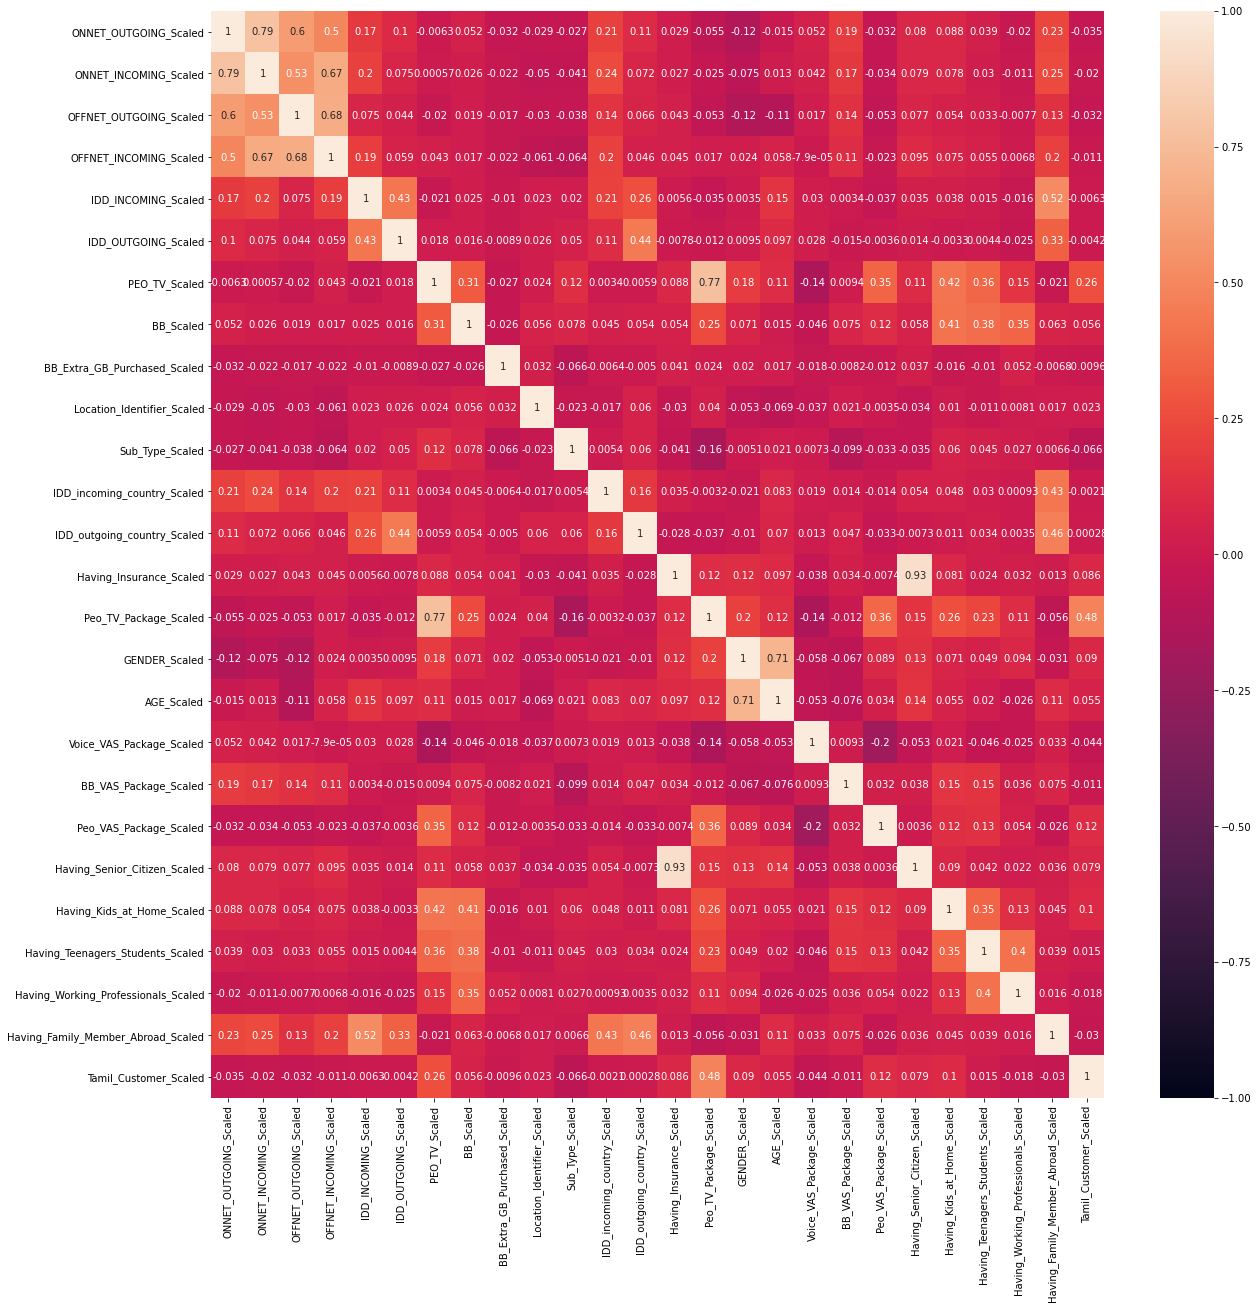

In [133]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

In [134]:
x= data.values

# Clustering Users with Scaled features

## Agglomerative Clustering and Dendrogram
- Hierarchical Clustering

In [135]:
result=shc.linkage(x, method="ward")

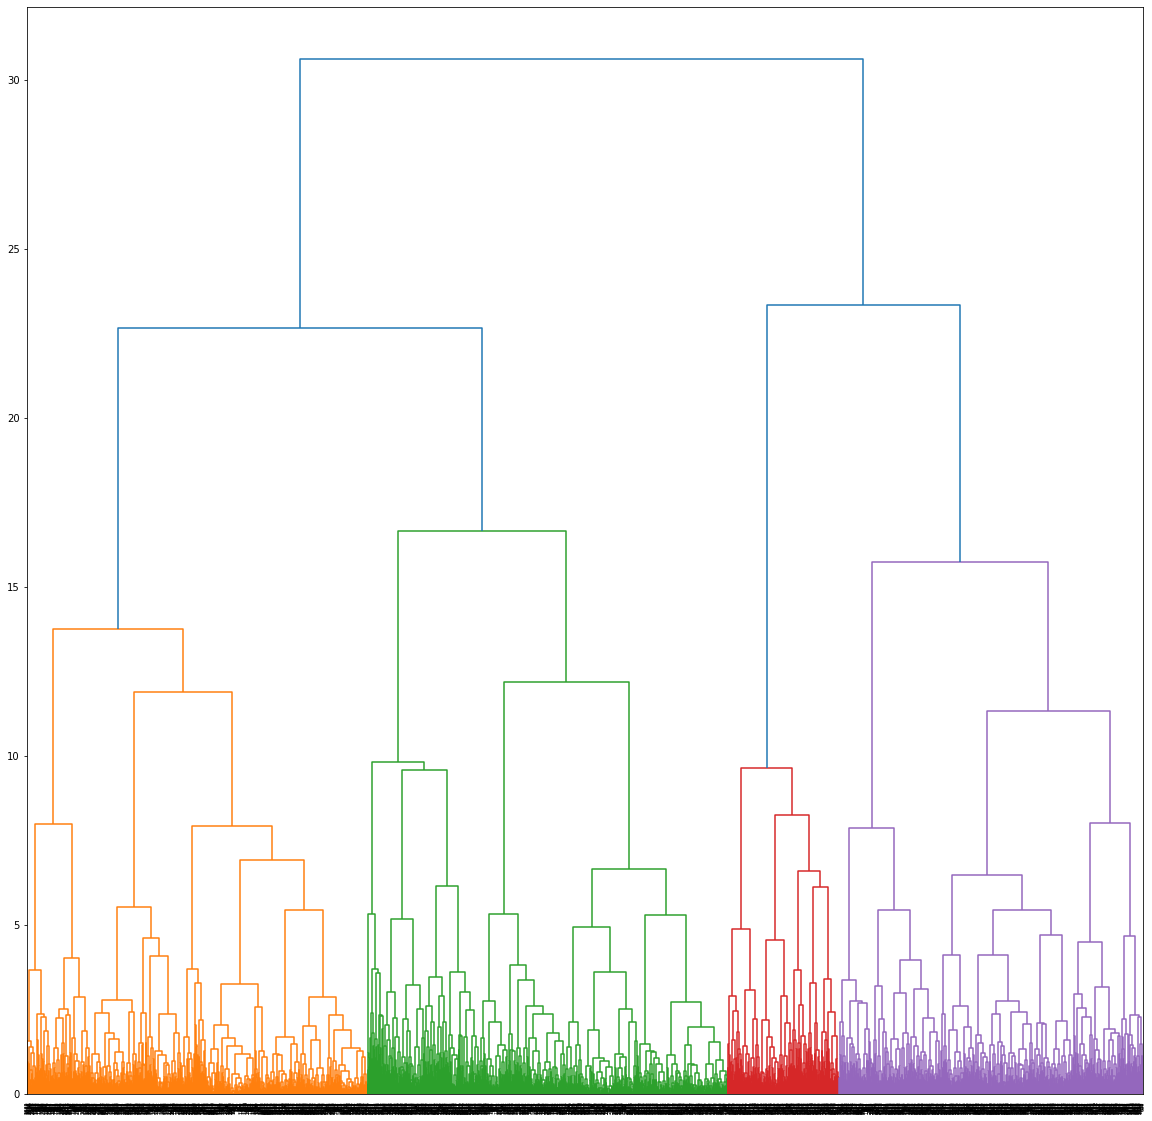

In [154]:
plt.figure(figsize=(20,20))
shc.dendrogram(result)
plt.show()

In [136]:
acl=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [137]:
acl.fit(x)

AgglomerativeClustering(n_clusters=4)

In [138]:
# cluster labels
acl.labels_

array([1, 0, 1, ..., 0, 0, 1])

### User counts in each cluster

In [139]:
cluster_labels=[0,1,2,3]
dict(zip(cluster_labels,np.bincount(acl.labels_)))

{0: 994, 1: 838, 2: 307, 3: 939}

# K-Means Clustering

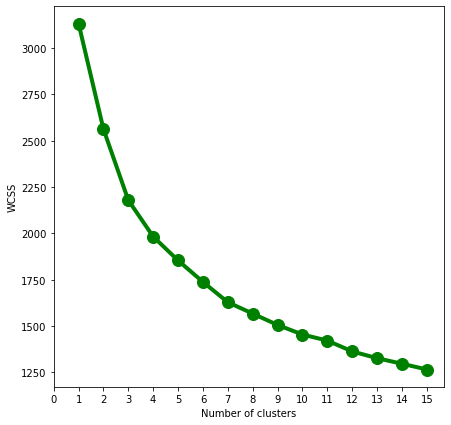

In [140]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,16):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,16),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(16))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [141]:
# since elbow occured at 3, let's consider 3 clusters
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [142]:
y_clusters

array([1, 0, 2, ..., 1, 1, 2], dtype=int32)

In [143]:
model.labels_

array([1, 0, 2, ..., 1, 1, 2], dtype=int32)

In [144]:
cluster_labels=[1,0,2,3]
dict(zip(cluster_labels,np.bincount(model.labels_)))

{1: 1056, 0: 971, 2: 736, 3: 315}

In [145]:
model.cluster_centers_

array([[1.05651417e-01, 1.01980051e-01, 1.09331006e-01, 1.03487968e-01,
        5.14886363e-02, 1.79059222e-02, 1.96081913e-02, 9.03221670e-02,
        4.15614479e-04, 4.97763540e-01, 8.89914773e-01, 2.90932820e-01,
        9.45846174e-02, 2.77555756e-17, 7.73200758e-02, 1.09375000e-01,
        2.80938193e-01, 8.76564096e-01, 1.52867965e-02, 1.46188447e-02,
        4.73484848e-04, 3.21969697e-03, 7.57575758e-04, 2.27272727e-03,
        3.23863636e-02, 1.60984848e-03],
       [9.61473287e-02, 9.46118763e-02, 1.09632012e-01, 1.06607942e-01,
        4.14134912e-02, 1.21256833e-02, 6.99665294e-03, 9.61798404e-02,
        7.74688180e-04, 5.09849464e-01, 8.63285273e-01, 2.67796254e-01,
        8.32038728e-02, 2.77555756e-16, 8.35736354e-02, 1.16992791e-01,
        3.06385170e-01, 1.63081421e-02, 1.97145800e-02, 2.76132853e-02,
        1.44181256e-03, 3.08959835e-04, 4.11946447e-04, 2.05973223e-03,
        2.72914521e-02, 1.95674562e-03],
       [9.65777720e-02, 9.78410177e-02, 9.90056806e-02

# Applying PCA for visualization purposes

### Find most approporiate no of components

In [146]:
pc=PCA(n_components=26) # 23
pc.fit(x)

PCA(n_components=26)

In [147]:
#How much variance,caputured individually
pc.explained_variance_

array([2.25254088e-01, 1.62414295e-01, 1.32174503e-01, 9.26187958e-02,
       6.90626216e-02, 6.49717395e-02, 6.06527914e-02, 5.03322294e-02,
       4.67899638e-02, 3.07583316e-02, 1.75483461e-02, 1.69279206e-02,
       1.42136575e-02, 1.30373738e-02, 6.55149038e-03, 4.21215521e-03,
       3.02569933e-03, 2.93337297e-03, 1.46544714e-03, 1.07419251e-03,
       5.57675354e-04, 4.66364539e-04, 4.00352915e-04, 2.22069913e-04,
       1.36849864e-04, 1.19663086e-04])

In [148]:
#How mucb variance, captured together
pc.explained_variance_ratio_.cumsum() 

array([0.22128816, 0.38084292, 0.5106903 , 0.60167841, 0.66952508,
       0.7333529 , 0.79293781, 0.84238387, 0.88835003, 0.91856681,
       0.9358062 , 0.95243608, 0.96639948, 0.97920731, 0.98564346,
       0.98978145, 0.99275388, 0.9956356 , 0.99707525, 0.99813053,
       0.99867839, 0.99913654, 0.99952984, 0.999748  , 0.99988244,
       1.        ])

/home/chiran/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



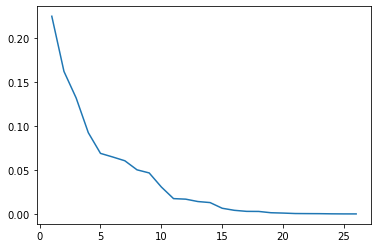

In [149]:
sns.lineplot(range(1,1+pc.explained_variance_.shape[0]),pc.explained_variance_)
plt.show()

### n=2 for 2D visualizations

In [150]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_2d = PCA(n_components=2)
pca_2d.fit(x)
reduced_data = pca_2d.fit_transform(x)
results_2d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_2d_df[['pca1','pca2']] = scaler.fit_transform(results_2d_df[['pca1','pca2']])

results = results_2d_df.values

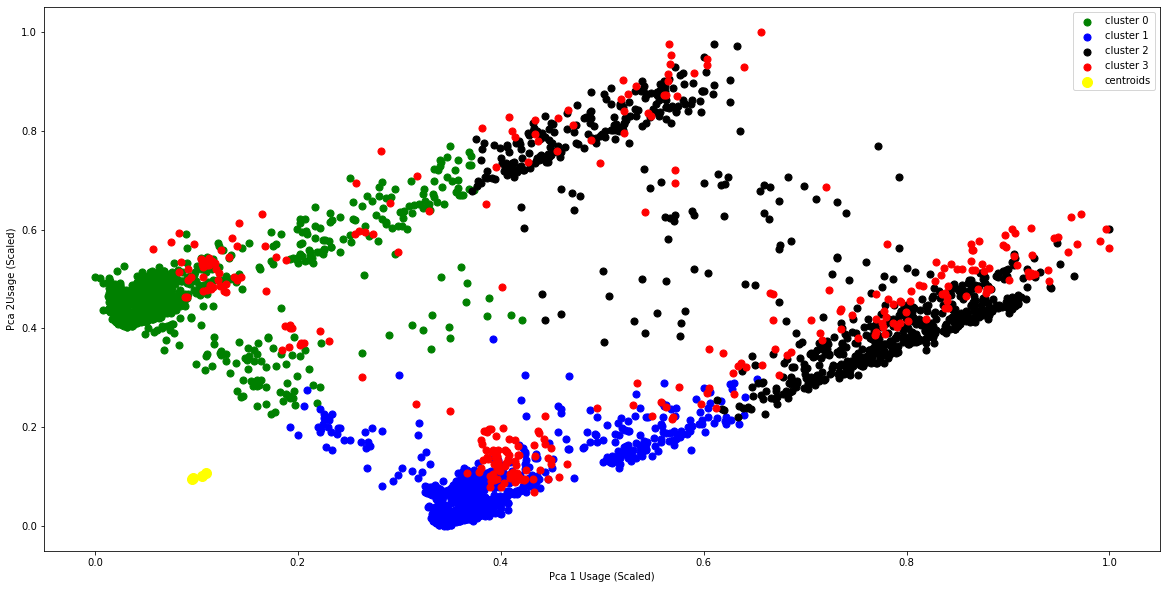

In [156]:
plt.figure(figsize = (20,10))
plt.scatter(results[y_clusters == 0,0],results[y_clusters == 0,1],s = 50, c = 'green', label = "cluster 0")
plt.scatter(results[y_clusters == 1,0],results[y_clusters == 1,1],s = 50, c = 'blue', label = "cluster 1")
plt.scatter(results[y_clusters == 2,0],results[y_clusters == 2,1],s = 50, c = 'black', label = "cluster 2")
plt.scatter(results[y_clusters == 3,0],results[y_clusters == 3,1],s = 50, c = 'red', label = "cluster 3")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Pca 1 Usage (Scaled)")
plt.ylabel("Pca 2Usage (Scaled)")
plt.legend()
plt.show()

### Using 3D visualization to visualize cluster densities more clearlity (n=3)

In [152]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_3d = PCA(n_components=3)
pca_3d.fit(x)
reduced_data = pca_3d.fit_transform(x)
results_3d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_3d_df[['pca1','pca2','pca3']] = scaler.fit_transform(results_3d_df[['pca1','pca2','pca3']])

results_3d = results_3d_df.values

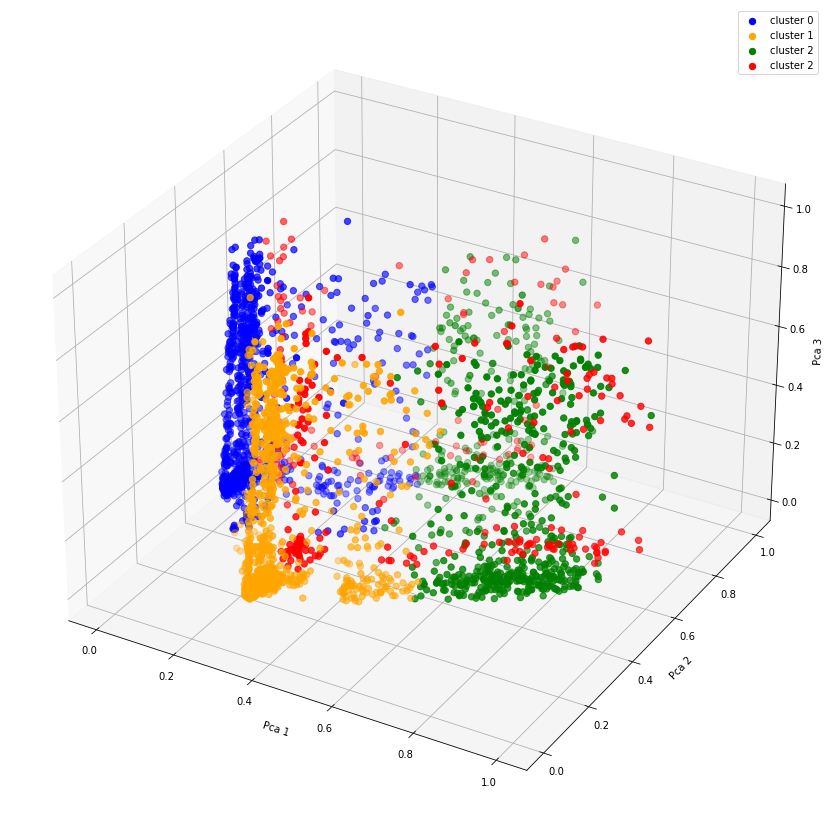

In [153]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_3d[y_clusters == 0,0],results_3d[y_clusters == 0,1],results_3d[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(results_3d[y_clusters == 1,0],results_3d[y_clusters == 1,1],results_3d[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(results_3d[y_clusters == 2,0],results_3d[y_clusters == 2,1],results_3d[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(results_3d[y_clusters == 3,0],results_3d[y_clusters == 3,1],results_3d[y_clusters == 3,2], s = 40 , color = 'red', label = "cluster 2")
ax.set_xlabel('Pca 1')
ax.set_ylabel('Pca 2')
ax.set_zlabel('Pca 3')
ax.legend()
plt.show()

In [155]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Adding clusters column to existing user profile

In [158]:
user_profile["Cluster"] = y_clusters

In [159]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 88 to 20103
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   event_source.hash                    3078 non-null   object 
 1   ACCOUNT_NUM.hash                     3078 non-null   object 
 2   CUSTOMER_REF.hash                    3078 non-null   object 
 3   ONNET_OUTGOING_Categorical           3078 non-null   object 
 4   ONNET_OUTGOING_Scaled                3078 non-null   float64
 5   ONNET_OUTGOING_Outlier               3078 non-null   object 
 6   ONNET_INCOMING_Categorical           2965 non-null   object 
 7   ONNET_INCOMING_Scaled                2965 non-null   float64
 8   ONNET_INCOMING_Outlier               2965 non-null   object 
 9   OFFNET_OUTGOING_Categorical          2962 non-null   object 
 10  OFFNET_OUTGOING_Scaled               2962 non-null   float64
 11  OFFNET_OUTGOING_Outlier     

In [160]:
user_profile.to_csv("data/user_profile/prepared/User_Profile_reduced_with_clusters.csv")